In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Getting the dataset

In [10]:
#columns_names = ["user_id", "item_id" , "rating" , "timestamp"]

df = pd.read_csv("ratings.csv")

In [11]:
df.shape

(100004, 4)

In [12]:
df.head()

,userId,item_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [13]:
df.shape

(100004, 4)

In [15]:
# Printing no. of unique user ids
df['userId'].nunique()


671

In [16]:
# Printing no. of unique users
df['item_id'].nunique()

9066

In [17]:
## Reading user file

movie_title = pd.read_csv("movies.csv")

In [53]:
movie_title

,item_id,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
9120,162672,Mohenjo Daro (2016)
9121,163056,Shin Godzilla (2016)
9122,163949,The Beatles: Eight Days a Week - The Touring Y...
9123,164977,The Gay Desperado (1936)


In [18]:
movie_title.head(10)

,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [19]:
# Merging files
df = pd.merge(df , movie_title ,on = "item_id")

In [20]:
df.head(5)

,userId,item_id,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


### Explorty data analisis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [22]:
## Title and rating ka mean pass kr dega
df.groupby('title').mean()['rating'].sort_values(ascending = False).head()

title
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973)    5.0
Alien Escape (1995)                                                                  5.0
Boiling Point (1993)                                                                 5.0
Bone Tomahawk (2015)                                                                 5.0
Borgman (2013)                                                                       5.0
Name: rating, dtype: float64

In [23]:
df.groupby('title').count()['rating'].sort_values(ascending = False)

title
Forrest Gump (1994)                                   341
Pulp Fiction (1994)                                   324
Shawshank Redemption, The (1994)                      311
Silence of the Lambs, The (1991)                      304
Star Wars: Episode IV - A New Hope (1977)             291
                                                     ... 
Robin Williams: Weapons of Self Destruction (2009)      1
Good German, The (2006)                                 1
Good Earth, The (1937)                                  1
Robot Overlords (2014)                                  1
İtirazım Var (2014)                                     1
Name: rating, Length: 9064, dtype: int64

In [24]:
## Making data frame based on these conditions
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [25]:
# adding no.of ratings column in dataset
ratings['num of ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [75]:
ratings

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [26]:
ratings.sort_values(by = 'rating' , ascending = False)

,rating,num of ratings
title,,
Ivan Vasilievich: Back to the Future (Ivan Vasilievich menyaet professiyu) (1973),5.0,1
Alien Escape (1995),5.0,1
Boiling Point (1993),5.0,1
Bone Tomahawk (2015),5.0,1
Borgman (2013),5.0,1
...,...,...
Waterloo Bridge (1940),0.5,1
Karla (2006),0.5,1
Ring of Terror (1962),0.5,1


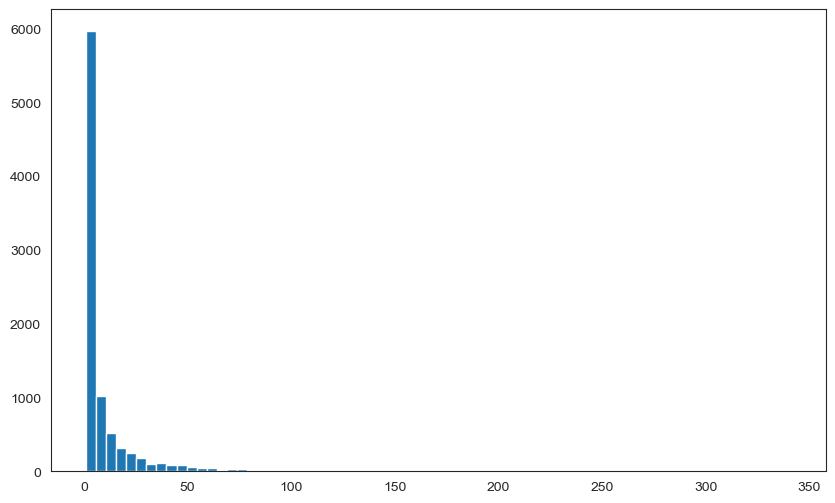

In [27]:
## Making plot of num of ratings
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'] , bins = 70)
plt.show()

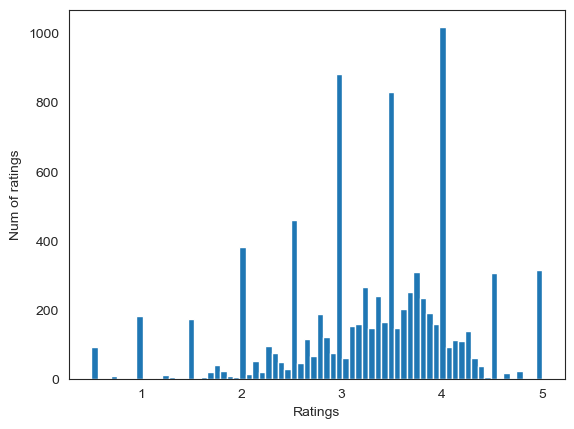

In [28]:

plt.hist(ratings['rating'] , bins = 70)
plt.xlabel("Ratings")
plt.ylabel("Num of ratings")
plt.show()

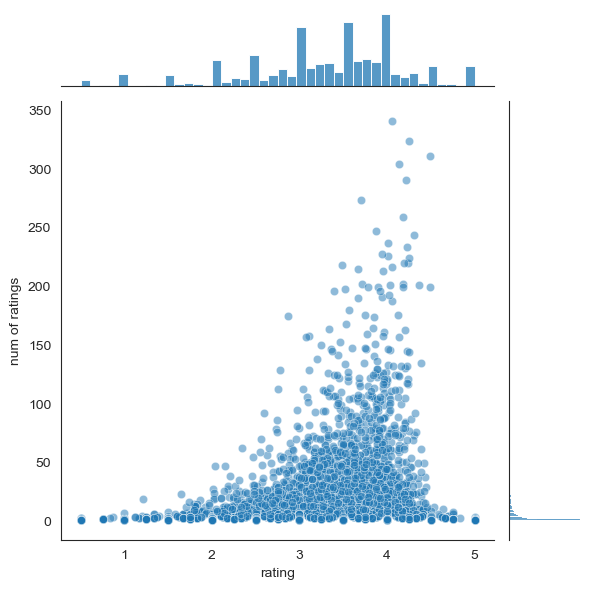

In [29]:
sns.jointplot(x='rating' , y='num of ratings' , data = ratings , alpha = 0.5)

### Creating movie recommendation

In [30]:
df.head()

,userId,item_id,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [31]:
moviemat = df.pivot_table(index = "userId" , columns = "title" , values = 'rating')

In [92]:
moviemat

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ratings.sort_values('num of ratings' , ascending = False).head()

,rating,num of ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291


In [40]:
# Printing every indivisuals rating to a movie 
PulpFiction_user = moviemat["Pulp Fiction (1994)"]

In [41]:
PulpFiction_user.head()

userId
1    NaN
2    4.0
3    4.5
4    5.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

In [45]:
# finding co-relation of PulpFiction movie ratings with other movies this will tell how much rating any movie got in comparison of PulpFiction
similar_to_PulpFiction = moviemat.corrwith(PulpFiction_user)

In [48]:
# converting similar_to_PulpFiction to dataFrame
corr_of_PulpFiction = pd.DataFrame(similar_to_PulpFiction , columns = ["Correlation"])

In [52]:
# Removing null values from correlation dataset
corr_of_PulpFiction.dropna(inplace = True)

In [54]:
corr_of_PulpFiction.sort_values("Correlation" , ascending = False).head()

,Correlation
title,
Gridlock'd (1997),1.0
"Women, The (1939)",1.0
Sidewalks of New York (2001),1.0
Code Unknown (Code inconnu: Récit incomplet de divers voyages) (2000),1.0
"Concert for George, The (2003)",1.0


##### Logic -> that if someone watches a movie recomment another movie that has highest co-rellation with that movie

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.750000,2
$9.99 (2008),3.833333,3
'Hellboy': The Seeds of Creation (2004),2.000000,1
'Neath the Arizona Skies (1934),0.500000,1
'Round Midnight (1986),2.250000,2
...,...,...
xXx (2002),2.478261,23
xXx: State of the Union (2005),1.000000,1
¡Three Amigos! (1986),3.258065,31


In [59]:
# Joining num of rating column from rating dataSet to correlation data set
corr_of_PulpFiction = corr_of_PulpFiction.join(ratings['num of ratings'])

In [64]:
## Keeping only those corre-lations that have greater than 100 rating in our dataSet for more accuracy
corr_of_PulpFiction = corr_of_PulpFiction[corr_of_PulpFiction["num of ratings"]>100].sort_values('Correlation' , ascending = False)

##### Prediction Function

In [76]:
def predict_movie(movie_name):
    movie_user_ratings = moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie["num of ratings"] > 100].sort_values("Correlation", ascending=False)
    
    return predictions


In [78]:
predictions = predict_movie("Titanic (1997)")
predictions.head()

,Correlation,num of ratings
title,,
Titanic (1997),1.000000,164
Twister (1996),0.520732,150
Ghost (1990),0.519725,126
Apollo 13 (1995),0.464661,200
Jaws (1975),0.448623,108


### Complete logic behind this function is:

###### movie_user_ratings = moviemat[movie_name]: This line retrieves the user ratings for the specified movie_name from the moviemat dataset. It assumes that moviemat is a matrix or dataframe where each row represents a movie and each column represents a user's rating for that movie.

##### similar_to_movie = moviemat.corrwith(movie_user_ratings): This line calculates the correlation between the ratings of the specified movie and all other movies in the moviemat dataset. It computes the correlation coefficient for each movie and creates a Series or DataFrame containing the correlation values.

##### corr_movie = pd.DataFrame(similar_to_movie, columns=["Correlation"]): This line converts the correlation values into a DataFrame called corr_movie with a single column named "Correlation". Each row represents a movie and its corresponding correlation with the specified movie.

##### corr_movie.dropna(inplace=True): This line removes any rows with missing values (NaN) from the corr_movie DataFrame.

##### corr_movie = corr_movie.join(ratings['num of ratings']): This line joins the "num of ratings" column from the ratings DataFrame with the corr_movie DataFrame. It assumes that ratings is a DataFrame that contains the number of ratings for each movie.

##### predictions = corr_movie[corr_movie["num of ratings"] > 100].sort_values("Correlation", ascending=False): This line filters the corr_movie DataFrame to include only movies that have more than 100 ratings. It then sorts the remaining movies based on their correlation with the specified movie in descending order, meaning the movies with higher correlation values will appear first in the resulting DataFrame called predictions.

##### Finally, the function returns the predictions DataFrame, which contains the recommended movies based on their correlation with the specified movie and the number of ratings they have received.

##### This function essentially provides movie recommendations by finding movies that are highly correlated with the specified movie and have a sufficient number of ratings. The correlation is used as a measure of similarity between movies, and the number of ratings serves as a criterion for popularity or reliability.





